# Pymaceuticals Inc.
---

### Analysis

- The merged data included about 10 various drug regimen. After deleting duplicate data, there was a total of 248 unique mouse ID. 49% of the data were female mice, while 51% of mice were male. 
- It was prevalent in the statistical summary that Ramican and Capomulin had the least tumor volume in this data set. It was also observed that Ketapril and Stelasyn had a significanly much higher tumor volume than the rest of the data set including the placebo. 
- Using a Bar and Pie chart, we were able to visualize our data in a way to understand distribution based on mice count per drug, and by sex. It can be observed that Capomulin has the most mice count per drug regimen. 
- By using the top 4 drug regimens with the lowest tumor volume, outliers and a box plot was constructed to understand which set of data is best to be used. 
- By Selecting Capomulin as the main point of observation, mouse ID U364 was selected as the data point to be observed. This is because it is within range of our data set and not an outlier. Plotting this set of data showcased a negative correlaton between timepont and tumor volume for mouse U364. As timepoint increased, the tumor volume decreases. 
- To understand if there's more correlation on Capomulin, a scattered plot was graphed to showcase the relationship between weight of Mice who used the drug regimen and their tumor volume. The scatter plot showed that the more a Mouse weighed, the higher its' tumor volume. 
- To understand more, a correlation and linear regression graph of weight vs tumor volume was consructed. The correlation showcased what was observed earlier. With a pearson r-value of 0.84, there is a high and positive corelation between tumor volme and mice weight who were on drug capomulin.
 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study= pd.merge(mouse_metadata,study_results, how= 'outer', on= "Mouse ID")

# Display the data table for preview
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
nmouse= mouse_study['Mouse ID'].nunique()
nmouse

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup= mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]['Mouse ID'].unique()
dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe= mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]
dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mouse_study[mouse_study['Mouse ID'].isin(dup)==False]
clean.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
nmice= clean["Mouse ID"].nunique()
nmice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

meantumor= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).mean()
mediantumor= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).median()
vartumor= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).var()
stdtumor= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).std()
semtumor= clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).sem()

tumor_stat=  pd.DataFrame({"Mean Tumor Volume":meantumor, 
                           "Median Tumor Volume":mediantumor, 
                           "Tumor Volume Variance":vartumor, 
                           "Tumor Volume Std. Dev.":stdtumor,
                           "Tumor Volume Std. Err.":semtumor})

tumor_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor_stat2= clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_stat2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

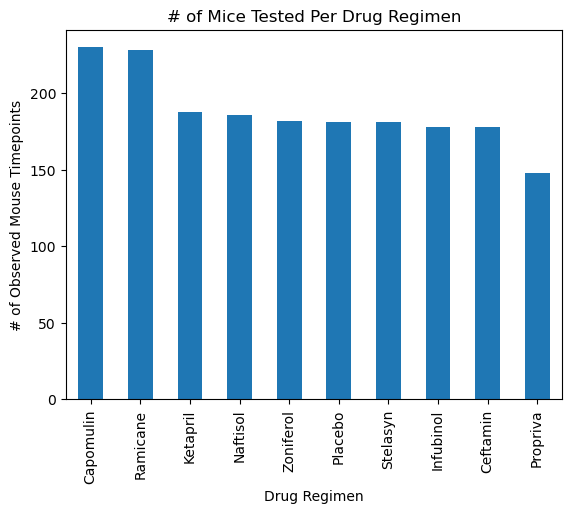

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = clean["Drug Regimen"].value_counts()
barchart= count.plot.bar(xlabel='Drug Regimen',ylabel='# of Observed Mouse Timepoints', title="# of Mice Tested Per Drug Regimen")

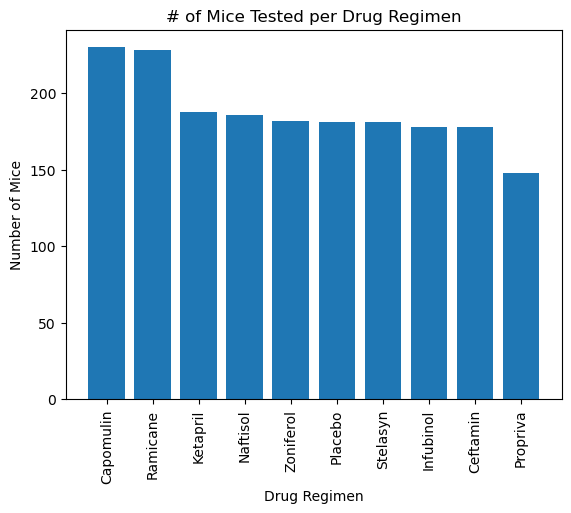

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = count.index.values
y_axis = count.values
plt.bar(x_axis, y_axis)
plt.title("# of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()

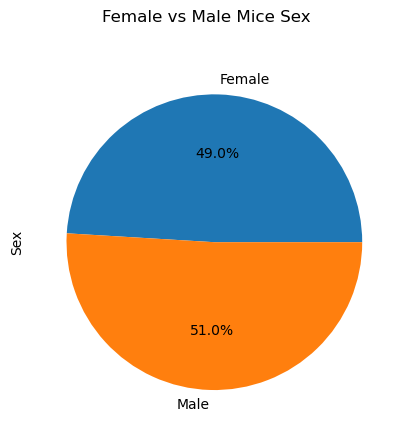

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean.groupby('Sex')
genderCount = gender['Sex'].count()
genderChart = genderCount.plot.pie(title= 'Female vs Male Mice Sex', subplots=True, autopct='%1.1f%%')

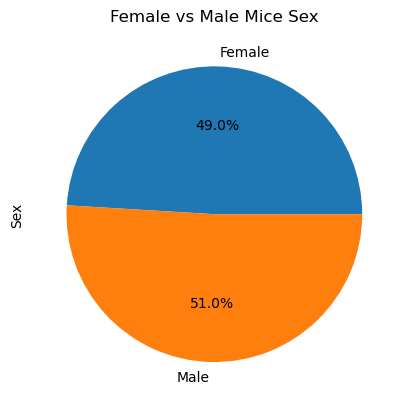

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender2= clean['Sex'].value_counts()
gender2
labels= ['Female','Male']
sizes=[922,958]
plt.pie(sizes,labels=labels, autopct="%1.1f%%")
plt.title('Female vs Male Mice Sex')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap = clean.loc[clean["Drug Regimen"] == "Capomulin",:]
ram = clean.loc[clean["Drug Regimen"] == "Ramicane", :]
inf = clean.loc[clean["Drug Regimen"] == "Infubinol", :]
ceft = clean.loc[clean["Drug Regimen"] == "Ceftamin", :]
merge = pd.concat([cap, ram, inf, ceft])

# Start by getting the last (greatest) timepoint for each mouse
max= merge.groupby('Drug Regimen').max()['Timepoint']
maxcount=45

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# already merged df with .concat
lastmerge = merge.loc[(merge["Timepoint"] == maxcount) ,:]
lastmerge= lastmerge.reset_index()
lastmerge

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,19,s185,Capomulin,Female,3,17,45,23.343598,1
1,29,x401,Capomulin,Female,16,15,45,28.484033,0
2,39,m601,Capomulin,Male,22,17,45,28.430964,1
3,104,u364,Capomulin,Male,18,17,45,31.023923,3
4,124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...,...
58,1670,w151,Ceftamin,Male,24,25,45,67.527482,3
59,1773,x581,Ceftamin,Female,19,28,45,64.634949,3
60,1797,x822,Ceftamin,Male,3,29,45,61.386660,3
61,1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumvol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # # Determine outliers using upper and lower bounds
for x in treatments:
    tum = lastmerge.loc[lastmerge['Drug Regimen']== x]
    tumvolume = tum["Tumor Volume (mm3)"]
    quartiles = tumvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    tumvol.append(tumvolume)
    print(f" {x} outliers are values below {lowerbound} and values higher than {upperbound}")

 Capomulin outliers are values below 20.70456164999999 and values higher than 51.83201549
 Ramicane outliers are values below 19.69048010125 and values higher than 49.79900043125001
 Infubinol outliers are values below 55.35777559500001 and values higher than 75.08224443499999
 Ceftamin outliers are values below 52.29350701999999 and values higher than 76.66786758


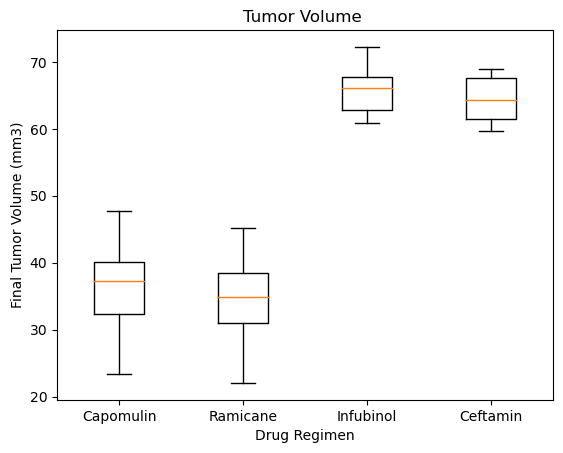

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume ')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumvol, labels=treatments, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

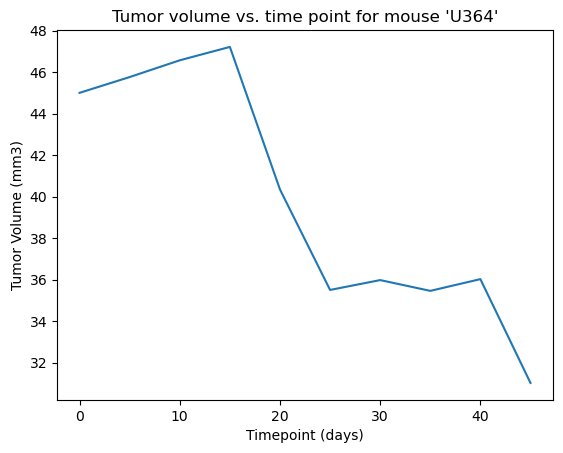

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singlemouse = cap.loc[cap['Mouse ID'] == "u364"]
xaxis = singlemouse["Timepoint"]
yaxis = singlemouse["Tumor Volume (mm3)"]
plt.plot(xaxis, yaxis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume vs. time point for mouse 'U364'")
plt.show()

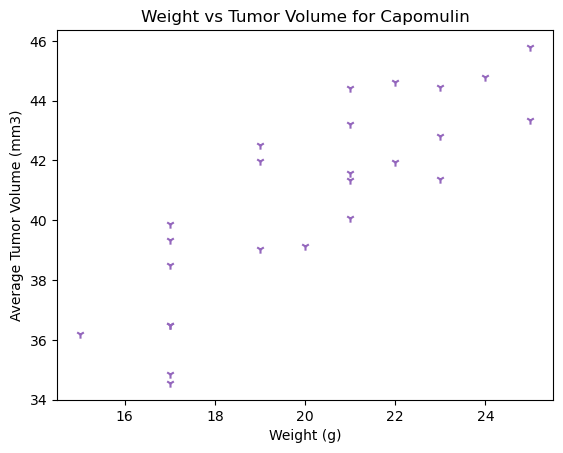

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capstudy = clean.loc[clean['Drug Regimen']== "Capomulin"]
x_axis= capstudy.groupby("Mouse ID")["Weight (g)"].mean()
y_axis= capstudy.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis, y_axis, marker="1", facecolors="tab:purple")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The pearson correlation between average mouse weight and average tumor volume is 0.84


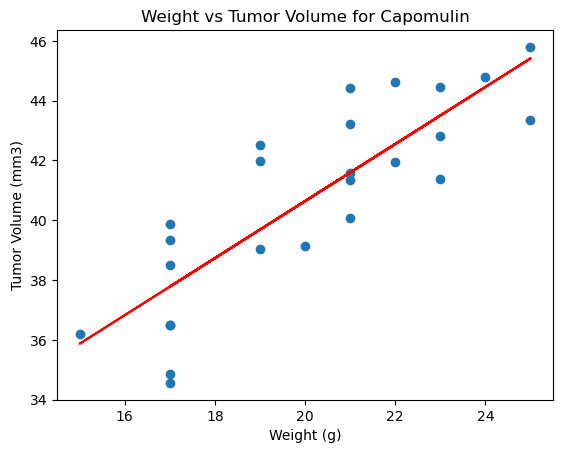

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation= st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
value = x_axis * slope + intercept
plt.plot(x_axis,value,"r-")
plt.scatter(x_axis,y_axis)
plt.title("Weight vs Tumor Volume for Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f'The pearson correlation between average mouse weight and average tumor volume is {round(correlation[0],2)}')
plt.show()
